In [174]:
import matplotlib.pyplot as plt
import machi.base as ac
import numpy as np
from hypso.download import download_nc_files

In [175]:
#download a hypso file for testing
download_nc_files(filename_list=["bergen_2024-06-11_1048Z-l1a.nc"],
                  download_dir="../../Downloads")

Downloading: bergen_2024-06-11_1048Z-l1a.nc [========================================================================================================================================] 100%


Processing *wide* Image with Dimensions: (598, 1092)
Radiometric Correction Ongoing
Smile Correction Ongoing
Destriping Correction Ongoing
L1b.nc file already exists. Not creating it.
Getting Projection Data without lat/lon correction =========================================
Generating Geotiff ************************************
  Projecting pixel geodetic to map ...
    [59.676258, 62.84088, 2.2058113, 6.317978]
    using UTM map: WGS 84 / UTM zone 31N EPSG: 32631
    Area covered by image: 31896734936.235332 m^2 = 31896.73493623533 km^2
  Bounding boxes and resample grid ...
  Grid points inside bounding polygon ...
    Points inside boundary: 1275122 / 3031671
  Registration, aka rectification, aka resampling, aka gridding ...
      Starting band 11
      Starting band 61
      Starting band 50
      Starting band 31
      Done with band 11
      Done with band 31
      Done with band 61
      Done with band 50
Done RGB/RGBA Geotiff
RGBA Tif File:  bergen_2024-06-11_1048Z-rgba_8bi

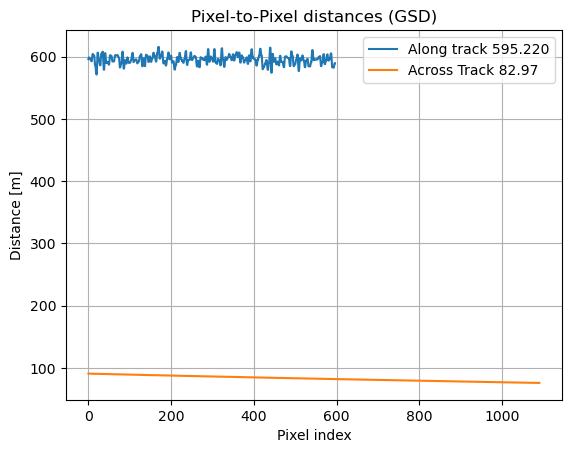

In [176]:
from hypso import Hypso

hypso_file_path="../../Downloads/bergen_2024-06-11_1048Z-l1a.nc"
# load and calibrate the hypso image, e.g. convert to radiance
satobj = Hypso(hypso_file_path)

In [177]:
# extract the wavelengths
wl = satobj.wavelengths[4:118]

In [178]:
# start working with ToA reflectance, so we don't have to worry about the solar spectrum
cube = satobj.get_toa_reflectance()[:,:,4:118]

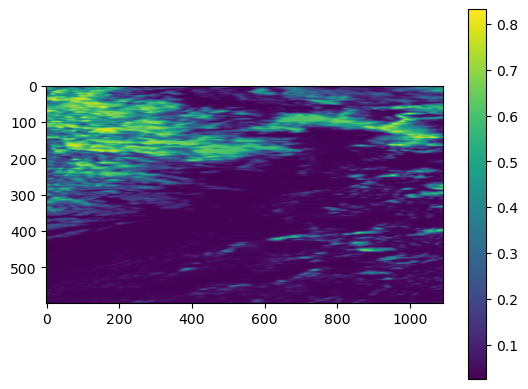

In [179]:
# view one band of the image
plt.imshow(cube[:,:,100])
plt.colorbar()

In [180]:
# identify saturated pixels
sat = np.max(satobj.rawcube, axis=-1) > 35000

In [307]:
# calculate the transmission and scattering coefficients for the image
# also save the objective function (for now) to verify that it is decreasing
il.reload(ac)
T, S, objs = ac.atm_correction(cube.reshape(-1,114), solar=np.ones(114), verbose=True,
                               tol=0.01, est_min_R=0.05)

0.0029675237117585546
0.0011688929568343625
0.0008008101391989376
0.0006870561716059314
0.0006342542007894796
0.0006067274150353008
0.0005913339894202019
0.0005822366225929142
0.0005764835004029839


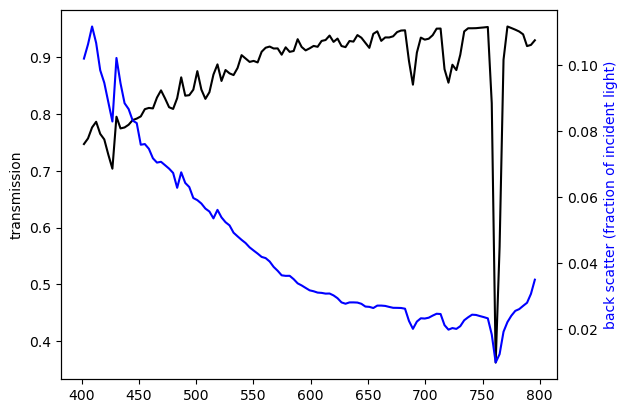

In [320]:
# plot the transmission and scattering vectors
fig, ax = plt.subplots(1)
ax.plot(wl,T, color='black')
ax.set_ylabel("transmission")
ax0 = ax.twinx()
ax0.set_ylabel("back scatter (fraction of incident light)", color='blue')
ax0.plot(wl,S, color='blue')

In [309]:
# normalize the whole cube
cube_norm = (cube - S) /T
cube_norm[sat] = np.nan

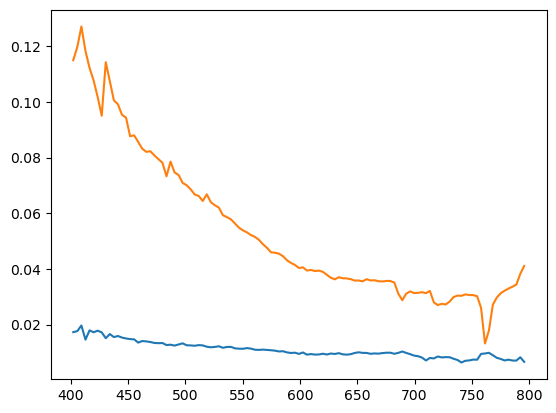

In [310]:
# compare a water pixel before and after atmospheric compensation
plt.plot(wl, cube_norm[400,600])
plt.plot(wl, cube[400,600])

In [311]:
# plot the RGB representation of the whole image
rgb = np.zeros(cube_norm.shape[:2] + (3,))

In [321]:
rgb[:,:,0] = cube_norm[:,:,65]
rgb[:,:,1] = cube_norm[:,:,47]
rgb[:,:,2] = cube_norm[:,:,20]
rgb*=20
rgb[rgb>1] =1
rgb[np.isnan(rgb)]=1

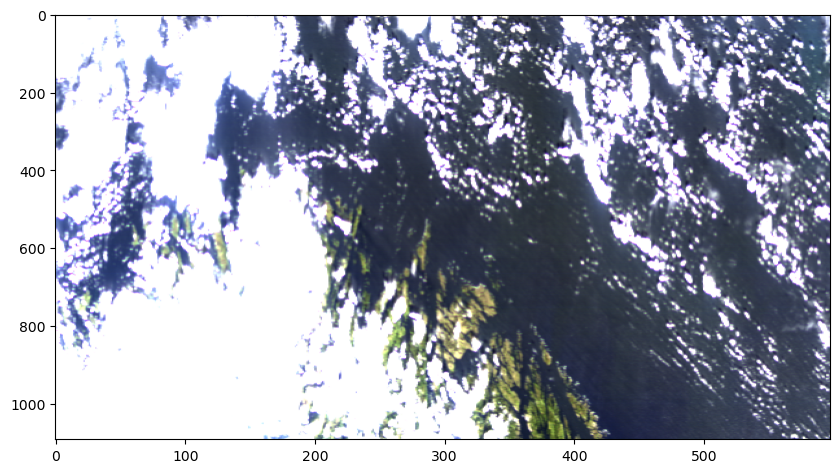

In [322]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
plt.imshow(np.rot90(rgb), aspect=0.3)

Generating Geotiff ************************************
  Projecting pixel geodetic to map ...
    [59.676258, 62.84088, 2.2058113, 6.317978]
    using UTM map: WGS 84 / UTM zone 31N EPSG: 32631
    Area covered by image: 31896734936.235332 m^2 = 31896.73493623533 km^2
  Bounding boxes and resample grid ...
  Grid points inside bounding polygon ...
    Points inside boundary: 1275122 / 3031671
  Registration, aka rectification, aka resampling, aka gridding ...
      Starting band 0
      Starting band 1
      Starting band 2
      Starting band 3
      Starting band 4
      Starting band 5
      Starting band 6
      Starting band 7
      Starting band 8
      Starting band 9
      Starting band 10
      Starting band 11
      Starting band 12
      Starting band 13
      Starting band 14
      Starting band 15
      Starting band 16
      Starting band 17
      Starting band 18
      Starting band 19
      Starting band 20
      Starting band 21
      Starting band 22
      Starting b

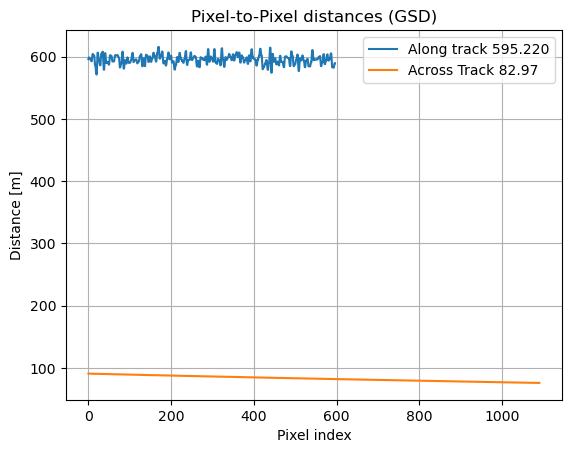

In [185]:
satobj.create_geotiff(product="L1C", force_reload=False)

Getting ACOLITE L2
Found bergen_2024-06-11_1048Z-l1b.nc
Running ACOLITE processing - Generic GitHub Clone
Python - linux - 3.9.18 | packaged by conda-forge | (main, Aug 30 2023, 03:49:32) [GCC 12.3.0]
Platform - Linux 6.5.0-41-generic - x86_64 - #41~22.04.2-Ubuntu SMP PREEMPT_DYNAMIC Mon Jun  3 11:32:55 UTC 2
Run ID - 20231201_094517
Identified /home/josephg/repos/MACHI/../../Downloads/bergen_2024-06-11_1048Z-l1b.nc as HYPSO type
Starting conversion of 1 scenes
Writing geolocation lon/lat
Wrote lon ((598, 1092))
Wrote lat ((598, 1092))
Writing geometry
Wrote vza ((598, 1092))
Wrote vaa ((598, 1092))
Wrote sza ((598, 1092))
Wrote saa ((598, 1092))
Wrote raa ((598, 1092))
Wrote rhot_388
Wrote rhot_391
Wrote rhot_395
Wrote rhot_399
Wrote rhot_402
Wrote rhot_406
Wrote rhot_409
Wrote rhot_413
Wrote rhot_416
Wrote rhot_420
Wrote rhot_423
Wrote rhot_427
Wrote rhot_430
Wrote rhot_434
Wrote rhot_438
Wrote rhot_441
Wrote rhot_445
Wrote rhot_448
Wrote rhot_452
Wrote rhot_455
Wrote rhot_459
Wrote 

Generating Geotiff ************************************
  Projecting pixel geodetic to map ...
    [59.676258, 62.84088, 2.2058113, 6.317978]
    using UTM map: WGS 84 / UTM zone 31N EPSG: 32631
    Area covered by image: 31896734936.235332 m^2 = 31896.73493623533 km^2
  Bounding boxes and resample grid ...
  Grid points inside bounding polygon ...
    Points inside boundary: 1275122 / 3031671
  Registration, aka rectification, aka resampling, aka gridding ...
      Starting band 0
      Starting band 1
      Starting band 2
      Starting band 3
      Starting band 4
      Starting band 5
      Starting band 6
      Starting band 7
      Starting band 8
      Starting band 9
      Starting band 10
      Starting band 11
      Starting band 12
      Starting band 13
      Starting band 14
      Starting band 15
      Starting band 16
      Starting band 17
      Starting band 18
      Starting band 19
      Starting band 20
      Starting band 21
      Starting band 22
      Starting b

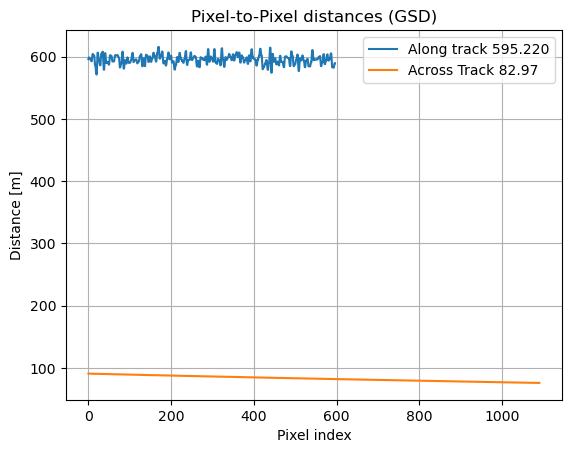

In [189]:
# we should remove these in the future, but they are in the other demo
atmos_params = {
    'user':'alvarof',
    'password':'nwz7xmu8dak.UDG9kqz'
}

satobj.create_geotiff(product="L2-ACOLITE", force_reload=False, atmos_dict=atmos_params)



-------  Py6S Atmospheric Correction  ----------
ROI:
Max Lat: 62.84088134765625  Min Lat: 59.6762580871582
Max Lon: 6.3179779052734375  Min Lon: 2.2058112621307373


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 120/120 [01:16<00:00,  1.57it/s]


Generating Geotiff ************************************
  Projecting pixel geodetic to map ...
    [59.676258, 62.84088, 2.2058113, 6.317978]
    using UTM map: WGS 84 / UTM zone 31N EPSG: 32631
    Area covered by image: 31896734936.235332 m^2 = 31896.73493623533 km^2
  Bounding boxes and resample grid ...
  Grid points inside bounding polygon ...
    Points inside boundary: 1275122 / 3031671
  Registration, aka rectification, aka resampling, aka gridding ...
      Starting band 0
      Starting band 1
      Starting band 2
      Starting band 3
      Starting band 4
      Starting band 5
      Starting band 6
      Starting band 7
      Starting band 8
      Starting band 9
      Starting band 10
      Starting band 11
      Starting band 12
      Starting band 13
      Starting band 14
      Starting band 15
      Starting band 16
      Starting band 17
      Starting band 18
      Starting band 19
      Starting band 20
      Starting band 21
      Starting band 22
      Starting b

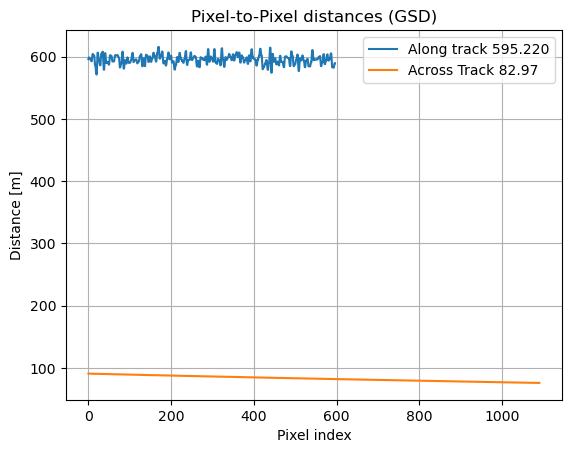

In [255]:
# this was not observed over Bergen this day, so we'll continue to use Alvaro's fairly low value
atmos_params = {
    'aot550': 0.0580000256
}

# AOT550 parameter gotten from: https://giovanni.gsfc.nasa.gov/giovanni/
# In this case, if you force reload, you would delete L1C so we set it to False
satobj.create_geotiff(product="L2-6SV1", force_reload=False, atmos_dict=atmos_params)



(0.0, 0.05)

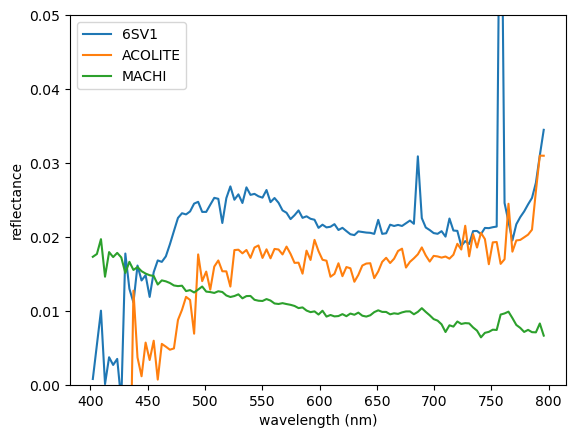

In [324]:
#plotting a water pixel
plt.plot(wl, satobj.l2a_cube['6SV1'][400,600,4:118], label='6SV1')
plt.plot(wl, satobj.l2a_cube['ACOLITE'][400,600,4:118], label='ACOLITE')
plt.plot(wl, cube_norm[400,600], label='MACHI')
plt.legend()
plt.xlabel("wavelength (nm)")
plt.ylabel("reflectance")
plt.ylim([0,0.05])

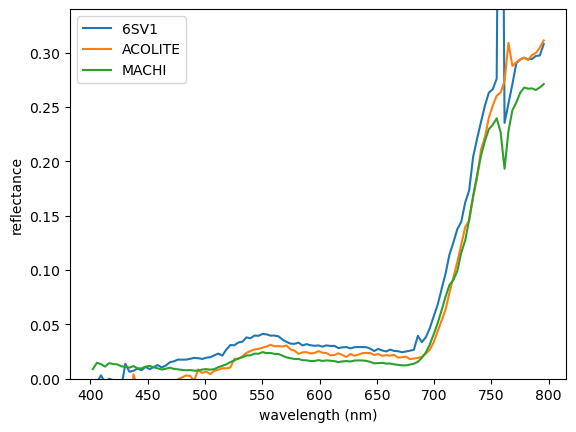

In [323]:
# plotting on a land pixel
plt.plot(wl, satobj.l2a_cube['6SV1'][390,0,4:118], label='6SV1')
plt.plot(wl, satobj.l2a_cube['ACOLITE'][390,0,4:118], label='ACOLITE')
plt.plot(wl, cube_norm[390,0], label='MACHI')
plt.ylim([0, 0.34])
plt.xlabel("wavelength (nm)")
plt.ylabel("reflectance")
plt.legend()
#plt.plot(wl, cube[390,0])